In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [3]:
x_Train=x_train_image.reshape(60000, 784).astype('float32')
x_Test=x_test_image.reshape(10000, 784).astype('float32')

In [4]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

In [5]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [16]:
model = Sequential()
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [17]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history = model.fit(x=x_Train_normalize,
                          y=y_Train_OneHot,validation_split=0.2,
                          epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.3606 - acc: 0.8919 - val_loss: 0.1622 - val_acc: 0.9527
Epoch 2/10
 - 1s - loss: 0.1587 - acc: 0.9526 - val_loss: 0.1184 - val_acc: 0.9666
Epoch 3/10
 - 1s - loss: 0.1165 - acc: 0.9652 - val_loss: 0.0951 - val_acc: 0.9713
Epoch 4/10
 - 1s - loss: 0.0915 - acc: 0.9728 - val_loss: 0.0839 - val_acc: 0.9750
Epoch 5/10
 - 1s - loss: 0.0765 - acc: 0.9767 - val_loss: 0.0806 - val_acc: 0.9757
Epoch 6/10
 - 1s - loss: 0.0659 - acc: 0.9796 - val_loss: 0.0778 - val_acc: 0.9774
Epoch 7/10
 - 1s - loss: 0.0556 - acc: 0.9824 - val_loss: 0.0748 - val_acc: 0.9775
Epoch 8/10
 - 1s - loss: 0.0489 - acc: 0.9848 - val_loss: 0.0699 - val_acc: 0.9786
Epoch 9/10
 - 1s - loss: 0.0432 - acc: 0.9868 - val_loss: 0.0688 - val_acc: 0.9783
Epoch 10/10
 - 1s - loss: 0.0381 - acc: 0.9882 - val_loss: 0.0674 - val_acc: 0.9788


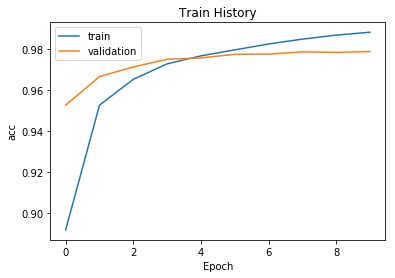

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history(train_history,'acc','val_acc')
#overfitting appearantly improve

In [22]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 26us/step

accuracy= 0.9816


In [24]:
model = Sequential()
model.add(Dense(units=1000,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dropout(0.5))
#add a hidden layer 2
model.add(Dense(units=1000,
                kernel_initializer='normal',
                activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [25]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=x_Train_normalize,
                          y=y_Train_OneHot,validation_split=0.2,
                          epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.3750 - acc: 0.8817 - val_loss: 0.1324 - val_acc: 0.9610
Epoch 2/10
 - 1s - loss: 0.1590 - acc: 0.9511 - val_loss: 0.1056 - val_acc: 0.9675
Epoch 3/10
 - 1s - loss: 0.1202 - acc: 0.9629 - val_loss: 0.0942 - val_acc: 0.9714
Epoch 4/10
 - 1s - loss: 0.0978 - acc: 0.9689 - val_loss: 0.0853 - val_acc: 0.9734
Epoch 5/10
 - 1s - loss: 0.0858 - acc: 0.9727 - val_loss: 0.0868 - val_acc: 0.9745
Epoch 6/10
 - 1s - loss: 0.0719 - acc: 0.9765 - val_loss: 0.0817 - val_acc: 0.9757
Epoch 7/10
 - 1s - loss: 0.0664 - acc: 0.9786 - val_loss: 0.0768 - val_acc: 0.9790
Epoch 8/10
 - 1s - loss: 0.0617 - acc: 0.9800 - val_loss: 0.0744 - val_acc: 0.9788
Epoch 9/10
 - 1s - loss: 0.0575 - acc: 0.9814 - val_loss: 0.0746 - val_acc: 0.9799
Epoch 10/10
 - 1s - loss: 0.0531 - acc: 0.9826 - val_loss: 0.0770 - val_acc: 0.9781


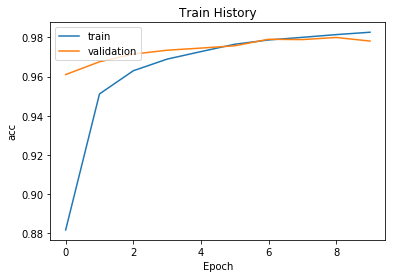

In [27]:
show_train_history(train_history,'acc','val_acc')

In [28]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])
# not much improve

10000/10000 [==============================] - 0s 25us/step

accuracy= 0.9801
